# グラフデータと経路

## クイズ

### Q1: グラフの定義

NetworkXを使って以下のグラフを定義し，可視化しなさい．


![](../../img/graph-sample.jpg)

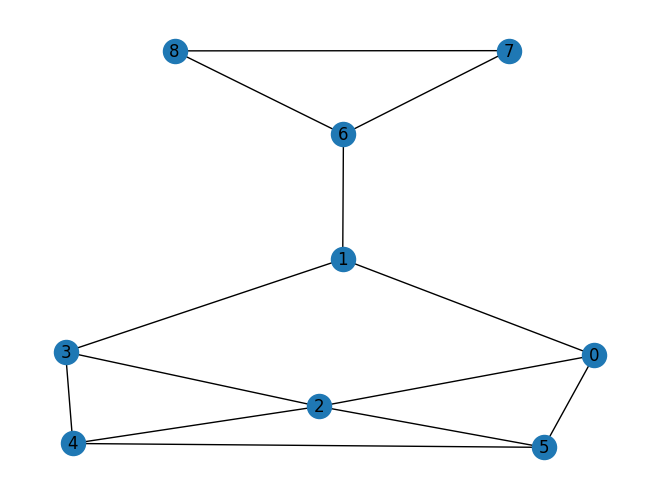

In [1]:
import networkx as nx

nodes = [0, 1, 2, 3, 4, 5, 6, 7, 8]
edges = [
    (0, 1),
    (0, 2),
    (1, 3),
    (2, 3),
    (2, 4),
    (0, 5),
    (2, 5),
    (3, 4),
    (4, 5),
    (1, 6),
    (6, 7),
    (7, 8),
    (8, 6)
]

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

nx.draw(G, with_labels=True)

### Q2: 到達可能性

Q1で定義したグラフについて，ノード4からノード6に4ホップで到達できる経路はいくつあるかを求めなさい．

In [2]:
import numpy as np

A = nx.adjacency_matrix(G).toarray()
np.linalg.matrix_power(A, 4)[4, 6]

3

### Q3: ソーシャルグラフ

[SNAP Facebook Dataset](https://snap.stanford.edu/data/ego-Facebook.html)は，スタンフォード大学のソーシャルネットワーク分析プロジェクトが公開しているデータセットの一つである．
このデータセットにはFacebookから抽出したユーザ間のつながり（フレンド関係）が格納されている．

以下のコードは，データセットを読み込み，NetworkXのグラフ形式に変換し，グラフを可視化するコードである．
読み込んだグラフ（`G_facebook`）に対して最短経路アルゴリズムを適用し，グラフ上の全ノード間の距離を計算しなさい．
その上で，計算したノード間の距離の平均値を求めなさい．

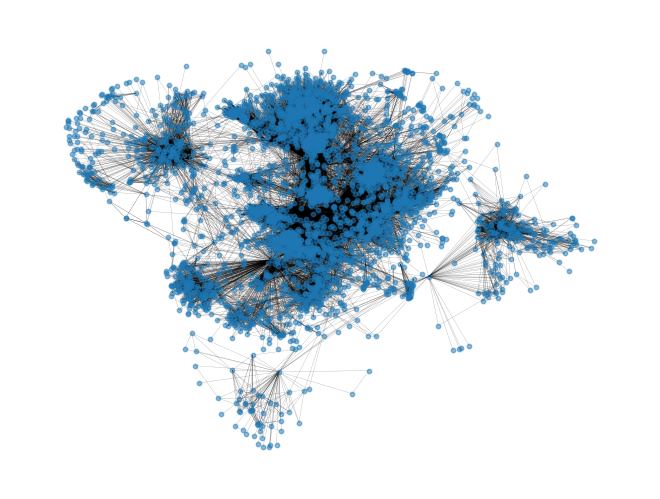

In [3]:
import pandas as pd
import networkx as nx

# データのダウンロード via pandas
facebook_df = pd.read_csv(
    "https://snap.stanford.edu/data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)

# NetworkXのグラフに変換
G_facebook = nx.from_pandas_edgelist(facebook_df, "start_node", "end_node")

# 表示位置を調整して可視化
pos = nx.spring_layout(G_facebook, iterations=15, seed=1721)
nx.draw(G_facebook, pos, node_size=10, with_labels=False, width=0.15, alpha=0.5)

In [ ]:
path_lengths = []

all_shortest_paths = dict(nx.all_pairs_shortest_path(G_facebook))
for node_from, shortest_paths in all_shortest_paths.items():
    for node_to, shortest_path in shortest_paths.items():
        path_length = len(shortest_path) - 1
        if path_length > 0:
            path_lengths.append(path_length)

np.mean(path_lengths)

3.6925068496963913